In [36]:
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('../data/Netflix.csv')
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
99,s100,TV Show,On the Verge,NaN,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States",7-Sep-21,2021,TV-MA,1 Season,"TV Comedies, TV Dramas","Four women — a chef, a single mom, an heiress ..."
53,s54,Movie,InuYasha the Movie 4: Fire on the Mystic Island,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,15-Sep-21,2004,TV-PG,88 min,"Action & Adventure, Anime Features, Internatio...","Ai, a young half-demon who has escaped from Ho..."
156,s157,Movie,Letters to Juliet,Gary Winick,"Amanda Seyfried, Christopher Egan, Gael García...",United States,1-Sep-21,2010,PG,105 min,"Comedies, Dramas, Romantic Movies",By responding to a letter addressed to Shakesp...
83,s84,TV Show,Metal Shop Masters,NaN,Jo Koy,NaN,10-Sep-21,2021,TV-MA,1 Season,Reality TV,"On this competition show, a group of metal art..."
153,s154,TV Show,Kid-E-Cats,NaN,"Lori Gardner, Kate Bristol, Billy Bob Thompson...",Russia,1-Sep-21,2016,TV-Y,2 Seasons,Kids' TV,"Cookie, Pudding and Candy are kitten siblings ..."


In [38]:
df.shape

(200, 12)

In [39]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [40]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [41]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,200,200,200,137,180,136,200,200.000000,200,200,200,200
unique,200,2,200,123,179,44,26,NaN,10,71,97,199
top,s1,Movie,Dick Johnson Is Dead,Toshiya Shinohara,"Vijay Sethupathi, Parthiban, Raashi Khanna",United States,1-Sep-21,NaN,TV-MA,1 Season,"Action & Adventure, Anime Features, Internatio...",A budding politician has devious plans to rise...
freq,1,127,1,4,2,50,56,NaN,50,43,12,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.230000,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.609089,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.750000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       200 non-null    object
 1   type          200 non-null    object
 2   title         200 non-null    object
 3   director      137 non-null    object
 4   cast          180 non-null    object
 5   country       136 non-null    object
 6   date_added    200 non-null    object
 7   release_year  200 non-null    int64 
 8   rating        200 non-null    object
 9   duration      200 non-null    object
 10  listed_in     200 non-null    object
 11  description   200 non-null    object
dtypes: int64(1), object(11)
memory usage: 18.9+ KB


In [43]:
df.nunique()

show_id         200
type              2
title           200
director        123
cast            179
country          44
date_added       26
release_year     41
rating           10
duration         71
listed_in        97
description     199
dtype: int64

In [44]:
df = df.set_index('show_id')
df.sample(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s64,Movie,Naruto the Movie: Ninja Clash in the Land of Snow,Tensai Okamura,"Junko Takeuchi, Noriaki Sugiyama, Chie Nakamur...",Japan,15-Sep-21,2004,TV-PG,83 min,"Action & Adventure, Anime Features, Internatio...","Naruto, Sasuke and Sakura learn they'll be pro..."
s188,TV Show,The Ingenuity of the Househusband,NaN,Kenjiro Tsuda,NaN,29-Aug-21,2021,TV-G,1 Season,"International TV Shows, TV Comedies",A tough guy with a knack for housework tackles...
s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom",8-Sep-21,2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
s88,TV Show,Titipo Titipo,NaN,"Jeon Hae-ri, Kim Eun-ah, Hong Bum-ki, Nam Do-h...",NaN,10-Sep-21,2019,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows",Titipo the train is out to prove that he's got...
s154,TV Show,Kid-E-Cats,NaN,"Lori Gardner, Kate Bristol, Billy Bob Thompson...",Russia,1-Sep-21,2016,TV-Y,2 Seasons,Kids' TV,"Cookie, Pudding and Candy are kitten siblings ..."


In [45]:
df = df.rename(columns={'date_added':'date','listed_in':'genre'})
df.sample()

,type,title,director,cast,country,date,release_year,rating,duration,genre,description
show_id,,,,,,,,,,,
s60,Movie,Naruto Shippuden: The Movie,Hajime Kamegaki,"Junko Takeuchi, Chie Nakamura, Yoichi Masukawa...",Japan,15-Sep-21,2007,TV-PG,95 min,"Action & Adventure, Anime Features, Internatio...",The adventures of adolescent ninja Naruto Uzum...


In [46]:
df['date'] = pd.to_datetime(df['date'])
df.sample()

C:\Users\Franco Quintana\AppData\Local\Temp\ipykernel_23020\3280412167.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,type,title,director,cast,country,date,release_year,rating,duration,genre,description
show_id,,,,,,,,,,,
s152,Movie,Initial D,"Andrew Lau Wai-keung, Alan Mak","Jay Chou, Anne Suzuki, Edison Chen, Anthony Wo...","China, Hong Kong",2021-09-01,2005,TV-14,109 min,"Action & Adventure, International Movies","By day, an 18-year-old delivers tofu for his f..."


In [47]:
df['director'].isna().any()

True

In [48]:
for col in df.columns:
    if df[col].isnull().any():
        print(f'{col} = {df[col].isnull().sum()} and dtype = {df[col].dtype}')

director = 63 and dtype = object
cast = 20 and dtype = object
country = 64 and dtype = object


In [49]:
df['cast'] = df['cast'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df.isna().any()

type            False
title           False
director        False
cast            False
country         False
date            False
release_year    False
rating          False
duration        False
genre           False
description     False
dtype: bool

In [50]:
df.sample(5)

,type,title,director,cast,country,date,release_year,rating,duration,genre,description
show_id,,,,,,,,,,,
s26,TV Show,Love on the Spectrum,Unknown,Brooke Satchwell,Australia,2021-09-21,2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
s174,Movie,Snervous Tyler Oakley,Amy Rice,Tyler Oakley,United States,2021-09-01,2015,PG-13,83 min,"Documentaries, LGBTQ Movies",The inspiring Internet star and LGBT advocate ...
s88,TV Show,Titipo Titipo,Unknown,"Jeon Hae-ri, Kim Eun-ah, Hong Bum-ki, Nam Do-h...",Unknown,2021-09-10,2019,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows",Titipo the train is out to prove that he's got...
s89,Movie,Blood Brothers: Malcolm X & Muhammad Ali,Marcus Clarke,"Malcolm X, Muhammad Ali",Unknown,2021-09-09,2021,PG-13,96 min,"Documentaries, Sports Movies","From a chance meeting to a tragic fallout, Mal..."


C:\Users\Franco Quintana\AppData\Local\Temp\ipykernel_23020\2414542171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


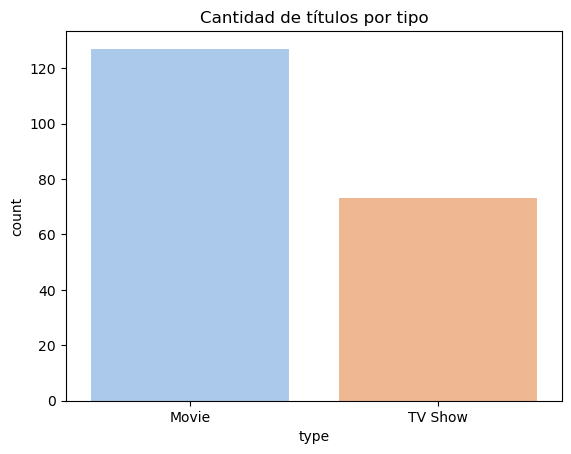

In [59]:
# Cantidad de titulos por tipo
titles_by_type = df['type'].value_counts()
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Cantidad de títulos por tipo')
plt.show()

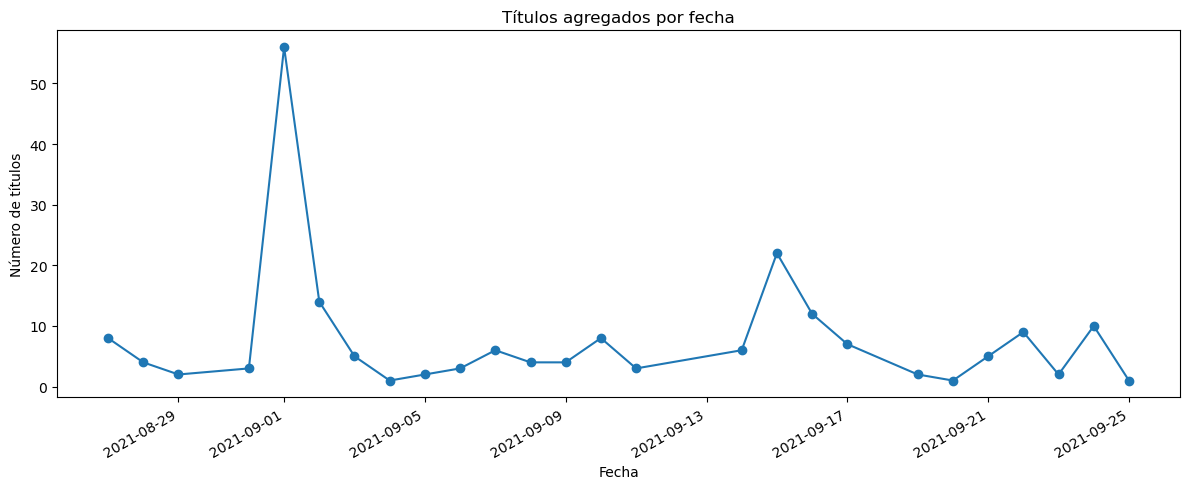

In [77]:
# Cantidad de titulos por año
titles_by_year = df['release_year'].value_counts().sort_index()
titles_by_date.plot(kind='line', marker='o', figsize=(12,5), title='Títulos agregados por fecha', xlabel = 'Fecha', ylabel='Número de títulos')
plt.tight_layout()
plt.show()

In [58]:
titles_by_country

country
Unknown                                                                  64
United States                                                            50
India                                                                    15
Japan                                                                    14
United Kingdom                                                            5
Nigeria                                                                   4
United Kingdom, United States                                             4
Australia                                                                 3
Germany, United States                                                    2
United States, Canada                                                     2
France                                                                    2
South Korea                                                               2
China, Canada, United States                                              1
Sout

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

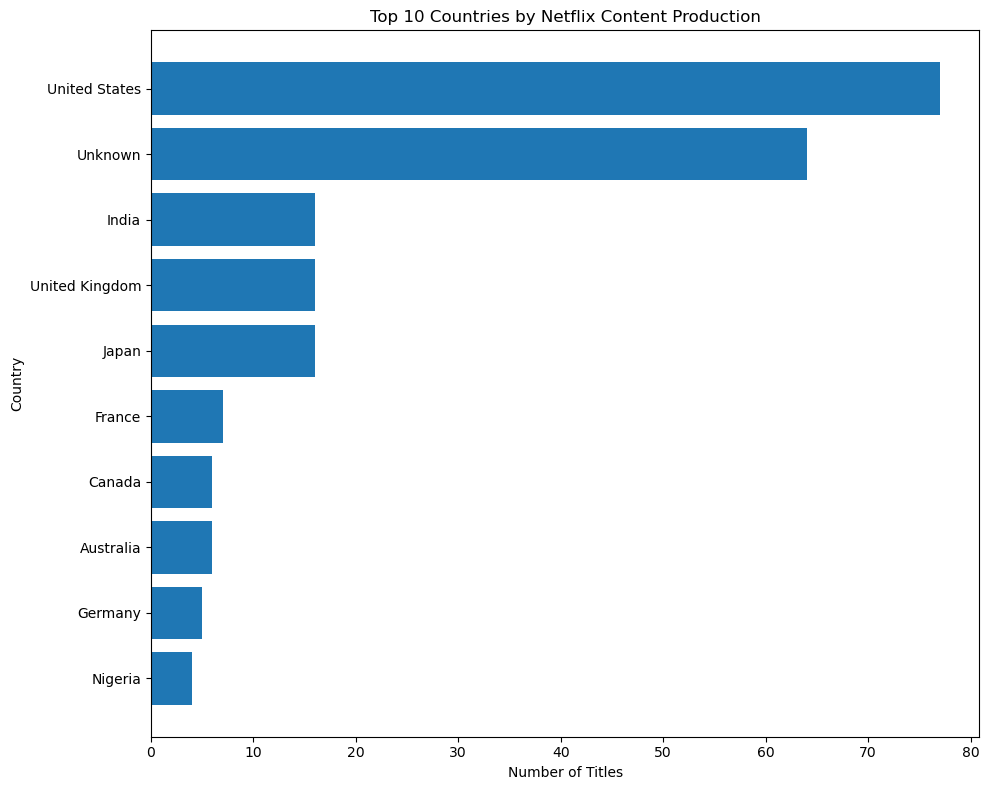

In [84]:
# Handle multiple countries and count
countries = df['country'].dropna().str.split(', ').explode()
country_counts = countries.value_counts().head(10)

# Horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(country_counts.index, country_counts.values)
plt.title('Top 10 Countries by Netflix Content Production')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

C:\Users\Franco Quintana\AppData\Local\Temp\ipykernel_23020\866254123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_country.index, x=top_country.values, palette="viridis")


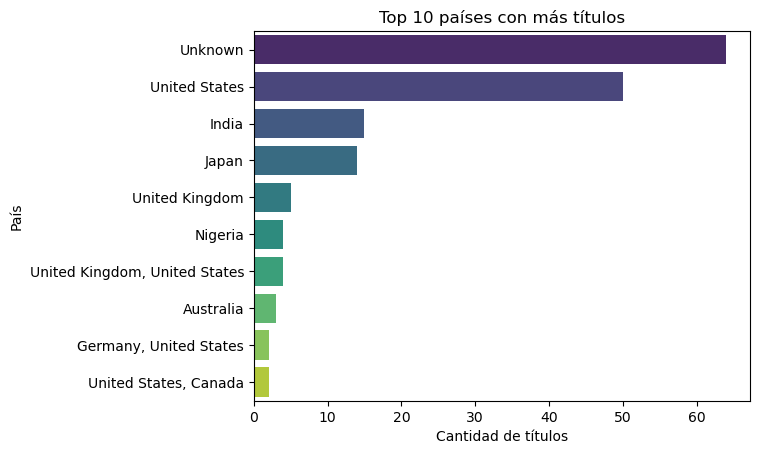

In [53]:
# Cantidad de titulos por pais
titles_by_country = df['country'].value_counts()
top_country = titles_by_country.head(10)
sns.barplot(y=top_country.index, x=top_country.values, palette="viridis")
plt.title('Top 10 países con más títulos')
plt.xlabel('Cantidad de títulos')
plt.ylabel('País')
plt.show()

In [54]:
# Cantidad de titulos por lanzamiento
titles_by_release = df['date'].value_counts().sort_index()
titles_by_release

date
2021-08-27     8
2021-08-28     4
2021-08-29     2
2021-08-31     3
2021-09-01    56
2021-09-02    14
2021-09-03     5
2021-09-04     1
2021-09-05     2
2021-09-06     3
2021-09-07     6
2021-09-08     4
2021-09-09     4
2021-09-10     8
2021-09-11     3
2021-09-14     6
2021-09-15    22
2021-09-16    12
2021-09-17     7
2021-09-19     2
2021-09-20     1
2021-09-21     5
2021-09-22     9
2021-09-23     2
2021-09-24    10
2021-09-25     1
Name: count, dtype: int64

In [55]:
# Cantidad de titulos por genero
titles_by_genre = df['genre'].value_counts().head(10)
titles_by_genre

genre
Action & Adventure, Anime Features, International Movies    12
Kids' TV                                                     8
Reality TV                                                   6
Kids' TV, TV Comedies                                        6
Comedies, Romantic Movies                                    6
Children & Family Movies                                     6
Dramas, International Movies, Thrillers                      6
Comedies, Dramas, International Movies                       5
Children & Family Movies, Comedies                           5
Action & Adventure, Comedies                                 5
Name: count, dtype: int64

In [56]:
# Cantidad de titlos por rating
titles_by_rating = df['rating'].value_counts()
titles_by_rating

rating
TV-MA    50
TV-14    34
PG-13    28
R        23
TV-PG    22
TV-Y7    14
PG       13
TV-Y     10
TV-G      5
G         1
Name: count, dtype: int64

In [57]:
# Cantidad de titulos por fecha
titles_by_date = df.groupby('date')['title'].count()
titles_by_date

date
2021-08-27     8
2021-08-28     4
2021-08-29     2
2021-08-31     3
2021-09-01    56
2021-09-02    14
2021-09-03     5
2021-09-04     1
2021-09-05     2
2021-09-06     3
2021-09-07     6
2021-09-08     4
2021-09-09     4
2021-09-10     8
2021-09-11     3
2021-09-14     6
2021-09-15    22
2021-09-16    12
2021-09-17     7
2021-09-19     2
2021-09-20     1
2021-09-21     5
2021-09-22     9
2021-09-23     2
2021-09-24    10
2021-09-25     1
Name: title, dtype: int64